# Week3 : DecisionTree Classifier - Poisonous Mushrooms Dataset - Part 1

### Chetan Kulkarni

#### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom

Import Libraries

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
from scipy import stats
import math

### Read the data set

In [153]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/mushrooms.csv")

In [154]:
data.shape

(8124, 23)


### EDA (Exploratory Data Analysis)
### Get the summary of the dataset

In [155]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Check for NA values

In [216]:
data.isna().sum().transpose()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Check the data types - All are objects Datatype, Hence convert into float using get dummies

In [171]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [172]:
#(data.nunique() == 2)[(data.nunique() == 2)].index

### Convert the object data to integer for unique values as 2

In [147]:
data['class'] = data['class'].map({'M':1,'B':0})
data['bruises'] = data['bruises'].map({'M':1,'B':0})
data['gill-attachment'] = data['gill-attachment'].map({'a':1,'f':0})
data['gill-spacing'] = data['gill-spacing'].map({'c':1,'w':0})
data['gill-size'] = data['gill-size'].map({'b':1,'n':0})
data['stalk-shape'] = data['stalk-shape'].map({'e':1,'t':0})

### Data Visualization

### Plot the count plot for Target variable

As we can the Edible values are more as compared to Poisionous values

8124

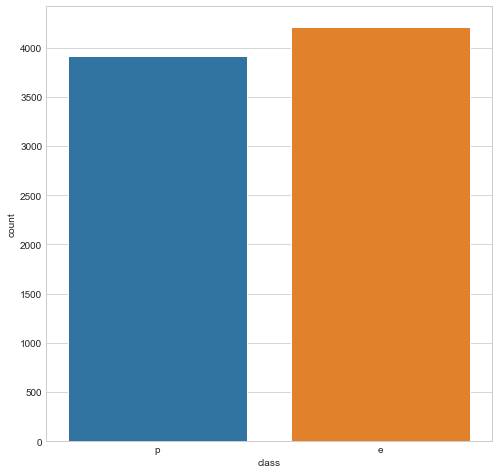

In [200]:
sns.countplot(data['class'])
data['class'].shape[0]

### Convert to get dummies

In [161]:
data_cat = pd.get_dummies(data.select_dtypes('object'),drop_first = True)
data_num = data.select_dtypes('int64','float64')
df = pd.concat([data_cat,data_num],axis = 1)
df.columns

Index(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-colo

### Check shape of the get dummies set, there are 96 columns

In [174]:
df.shape

(8124, 96)

### Load Features and Targets

In [214]:
X = df.drop('class_p', axis=1).values  
y = df['class_p'].values 

### Split Train and Test Sets

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

### Use GridSearchCV to calculate the cross validation score best_estimator and FIT the model

Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Calculate the model score

In [204]:
print("The prediction accuracy for test set: ",gsearch.score(X_test,y_test)*100,"%")

The prediction accuracy for test set:  100.0 %


In [205]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = gsearch.predict(X_test)  

In [221]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Confusion Matrix 

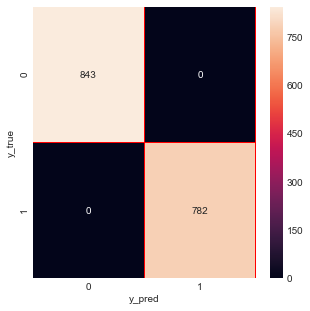

In [220]:
from sklearn.metrics import confusion_matrix
y_pred = gsearch.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Confusion  matrix output notes that the rules correctly predicted the edibility of all mushroom samples i.e. 100 percent of the mushroom samples. As shown, the confusion matrix has true positives and true negatives as 843 and 762 respectively that means it has predicted 843 times correctly that as edible and 762 times that it is poisonous.
Here, 0 is false positives  and 0 false negatives. Which means that it was predicted that it was poisonous, but it was edible or vice versa was zero

### ROC curve plot

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

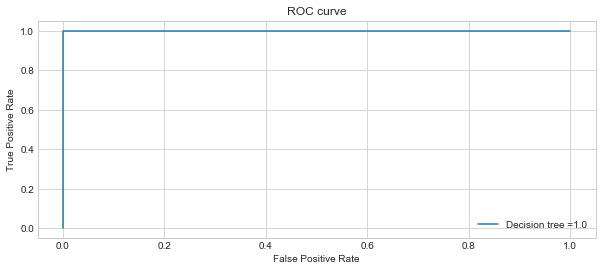

In [217]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,4))
fpr, tpr, thresholds = roc_curve(np.array(y_test).astype(int), y_pred)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="Decision tree =" + str(round(auc,3)),)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(b=True)
plt.legend()
plt.show()

## Conclusion
- With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
- The Decision classifier hit 100% accuracy with this dataset.

Accuracy Measures of Classification Techniques with Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model or "classifier" on a set of test data for which the true values are known.

Confusion Matrix:

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The classifier made a total of 1 predictions (e.g., 8124 mushrooms are tested for the edible and poisonous). By computing the statistical measures namely the true positives (TP), True Negatives (TN), False Positive (FP), and False Negatives (FN).

ROC curve : 
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between detecting True Positives(Edible) with False Positives(poisonous)
